# Data preprocessing
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

## The following steps are involved in data preprocessing
### 1. Importing the dataset and checking its format.

In [1]:
%matplotlib inline
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset
dataset = pd.read_csv('train_upd.csv')
test = pd.read_csv('test_upd.csv')
cell_name = test['cell_name']
dataset.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


### 2. Checking for any missing values in the dataset

In [2]:
#Checking Null values
print(dataset.isnull().sum())
print(test.isnull().sum())

cell_name                        0
4G_rat                           0
par_year                         0
par_month                        0
par_day                          0
par_hour                         0
par_min                          0
subscriber_count                 0
web_browsing_total_bytes         0
video_total_bytes                0
social_ntwrking_bytes            0
cloud_computing_total_bytes      0
web_security_total_bytes         0
gaming_total_bytes               0
health_total_bytes               0
communication_total_bytes        0
file_sharing_total_bytes         0
remote_access_total_bytes        0
photo_sharing_total_bytes        0
software_dwnld_total_bytes       0
marketplace_total_bytes          0
storage_services_total_bytes     0
audio_total_bytes                0
location_services_total_bytes    0
presence_total_bytes             0
advertisement_total_bytes        0
system_total_bytes               0
voip_total_bytes                 0
speedtest_total_byte

So, we see that none of the column have any missing values. Hence we proceed to the next step of encoding the categorical values.
### 3. Encoding categorical variables
There are 2 categorical variables namely, "ran_vendor" and "congestion type". We will use label encoding to encode them.

In [3]:
#separting the variables
X = dataset.iloc[:, 1:-1]
test = test.iloc[:, 1:]
y = dataset.iloc[:, 38:39]

# Encoding the "ran_vendor"
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 36] = labelencoder_X.fit_transform(X.iloc[:, 36])
test.iloc[:,36] = labelencoder_X.transform(test.iloc[:,36])
# Encoding the "Congestion_Type"
labelencoder_y = LabelEncoder()
y.iloc[:, 0] = labelencoder_y.fit_transform(y.iloc[:, 0])

#Concatenating
df = pd.concat([X,y], axis=1)
df.head()

,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1,2018,12,15,0,50,152,315,59012,2266,...,10,33,46,39,103,69,6,2,0,1
1,1,2018,12,7,20,5,54,1871,334,4530,...,22,20,7,10,21,93,7,5,2,3
2,1,2018,12,5,16,35,277,887,945,23753,...,14,91,49,147,159,77,6,3,0,0
3,0,2018,12,16,21,60,51,8577,494,7956,...,10,63,42,75,35,95,7,2,1,0
4,1,2018,12,4,6,60,117,2084,1056,7244,...,67,59,91,197,316,112,3,5,1,2


### 4. Feature Scaling
Standardize features by removing the mean and scaling to unit variance
The standard score of a sample x is calculated as:
z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [4]:
# Feature Scaling
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df.iloc[:, 6:36] = min_max_scaler.fit_transform(df.iloc[:, 6:36])
test.iloc[:, 6:36] = min_max_scaler.transform(test.iloc[:, 6:36])
df.head()

,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1,2018,12,15,0,50,0.009113,0.001003,0.178126,0.007451,...,0.006398,0.019643,0.027694,0.024209,0.064375,0.150000,0.8,0.000000,0,1
1,1,2018,12,7,20,5,0.003199,0.006006,0.000993,0.014918,...,0.014075,0.011905,0.004214,0.006207,0.013125,0.550000,1.0,1.000000,2,3
2,1,2018,12,5,16,35,0.016658,0.002842,0.002838,0.078319,...,0.008957,0.054167,0.029500,0.091248,0.099375,0.283333,0.8,0.333333,0,0
3,0,2018,12,16,21,60,0.003018,0.027569,0.001476,0.026217,...,0.006398,0.037500,0.025286,0.046555,0.021875,0.583333,1.0,0.000000,1,0
4,1,2018,12,4,6,60,0.007001,0.006691,0.003173,0.023869,...,0.042866,0.035119,0.054786,0.122284,0.197500,0.866667,0.2,1.000000,1,2


# Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### 1. Summary statistics of the data
Let's get the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [5]:
df.describe()

,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
count,78560.000000,78560.0,78560.0,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,...,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000,78560.000000
mean,0.499173,2018.0,12.0,15.503831,11.514588,33.061736,0.034413,0.026008,0.025020,0.027546,...,0.045417,0.042229,0.042501,0.043898,0.043580,0.499862,0.498429,0.501018,0.999478,1.498854
std,0.500002,0.0,0.0,8.634375,6.934351,16.535863,0.065198,0.061560,0.058753,0.064309,...,0.075382,0.069723,0.070829,0.073267,0.071637,0.293973,0.341859,0.371752,0.816530,1.120077
min,0.000000,2018.0,12.0,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2018.0,12.0,8.000000,5.000000,20.000000,0.004225,0.001376,0.001407,0.001524,...,0.008317,0.007738,0.007827,0.008070,0.008125,0.250000,0.200000,0.333333,0.000000,0.000000
50%,0.000000,2018.0,12.0,16.000000,12.000000,35.000000,0.011226,0.004960,0.005034,0.005524,...,0.019194,0.017857,0.018061,0.018622,0.018750,0.500000,0.400000,0.666667,1.000000,1.000000
75%,1.000000,2018.0,12.0,23.000000,18.000000,45.000000,0.034221,0.021099,0.020767,0.023092,...,0.047985,0.045238,0.044551,0.046555,0.046875,0.750000,0.800000,0.666667,2.000000,3.000000
max,1.000000,2018.0,12.0,30.000000,23.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000


There is notably a large difference between 75th %tile and max values of predictors "usage data". This suggest that there are extreme values-outliers in our dataset.
Now, let's check the count data for target variable "Congestion_Type".

In [6]:
#Checking count for target variable
df.Congestion_Type.value_counts()

3    19771
1    19765
0    19688
2    19336
Name: Congestion_Type, dtype: int64

This tells us that all 4 congestion type are nearly symmetrically and equally distributed.
Its a good glimpse of data but now let's explore data with beautiful graphs.

### 2. Data Visualization
One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

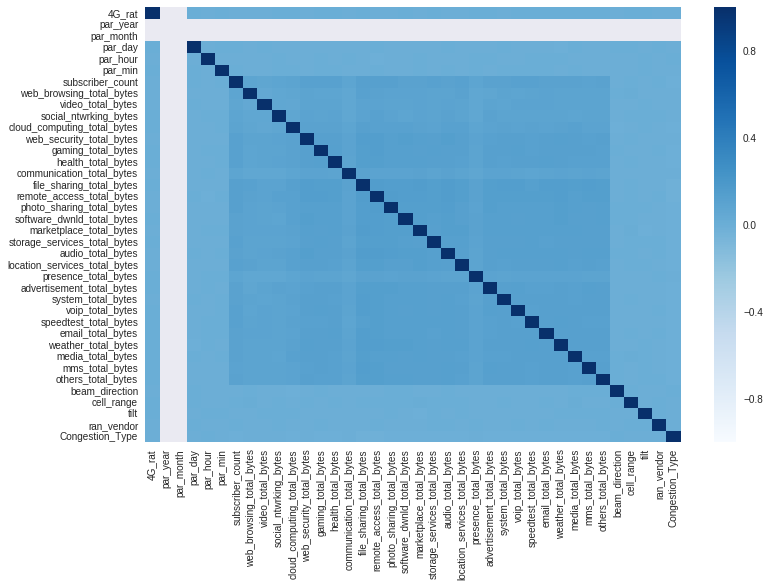

In [7]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

Dark shades represents positive correlation while lighter shades represents negative correlation. If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

**Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.**

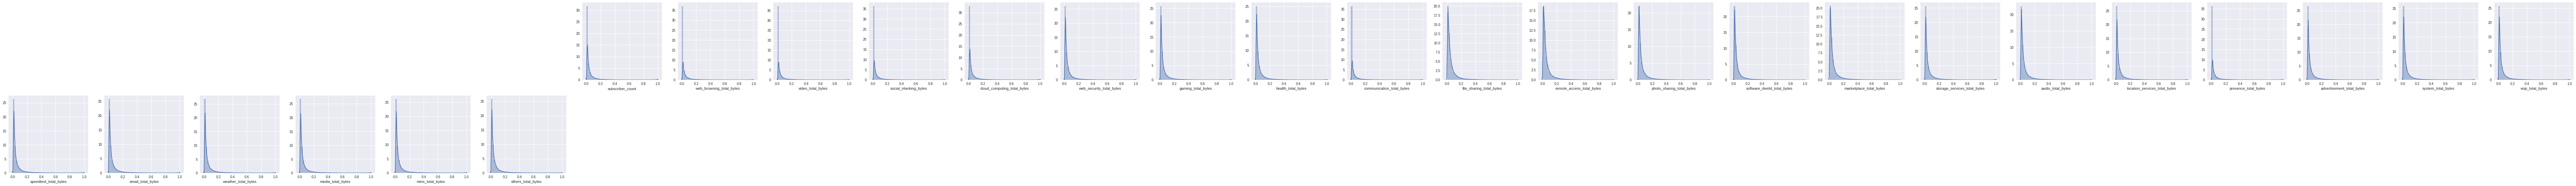

In [8]:
l = df.columns.values
number_of_columns=27
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
for i in range(6,33):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

All independent "usage data" variables are right skewed/positively skewed.

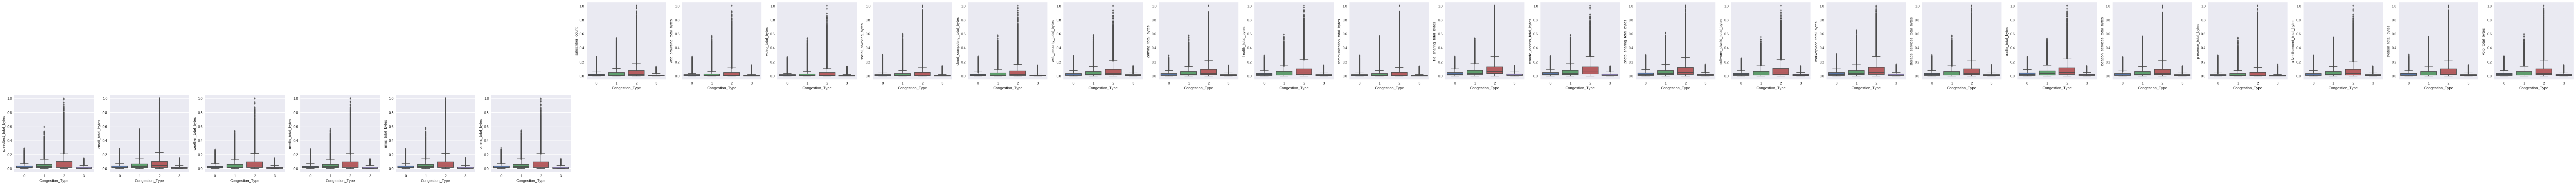

In [9]:
plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
for j in range(6,33):
    plt.subplot(number_of_rows + 1,number_of_columns,j+1)
    sns.boxplot(y=df[l[j]], x=df[l[37]])

# Feature Engineering
Feature engineering is an essential part of building any intelligent system. Feature engineering is the process of transforming data into features to act as inputs for machine learning models such that good quality features help in improving the overall model performance. 

### 1. Binning par_day and par_hour
We will make 2 buckets for par_day corresponding to weekdays and weekends. We will also make 4 buckets for par_hour corresponding to different times of the day(morning, day, evening and night). We expect the traffic to be unusual on weekends and different in different times of the day.

In [0]:
df['par_day'].replace(to_replace=[1,8,15,22,29,2,9,16,23,30],value=1,inplace=True)    # labeling 1 for weekend
df['par_day'].replace(to_replace=[3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,28,31],value=0,inplace=True)   #labeling 0 for weekdays


test['par_day'].replace(to_replace=[1,8,15,22,29,2,9,16,23,30],value=1,inplace=True)    # labeling 1 for weekend
test['par_day'].replace(to_replace=[3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,28,31],value=0,inplace=True)   #labeling 0 for weekdays

In [0]:
df.drop(['par_day'],inplace = True,axis=1)
test.drop(['par_day'],inplace = True, axis=1)

In [0]:
df['morning'] = [1 if(x>=2 and x<8) else 0 for x in df['par_hour']]
df['day'] = [1 if(x>=8 and x<18) else 0 for x in df['par_hour']]
df['evening'] = [1 if(x>=18 and x<22) else 0 for x in df['par_hour']]
df['night'] = [1 if(x>=22 or x<2) else 0 for x in df['par_hour']]

test['morning'] = [1 if(x>=2 and x<8) else 0 for x in test['par_hour']]
test['day'] = [1 if(x>=8 and x<18) else 0 for x in test['par_hour']]
test['evening'] = [1 if(x>=18 and x<22) else 0 for x in test['par_hour']]
test['night'] = [1 if(x>=22 or x<2) else 0 for x in test['par_hour']]

In [0]:
df.drop(['par_hour'],inplace = True,axis=1)
test.drop(['par_hour'],inplace = True, axis=1)

### 2. Clubbing the TCP and UDP Data Usage

There are 2 types of Internet Protocols, namely TCP(Transmission Control Protocol) and UDP(UserDatagram Protocol). All the data transmission using cellular networks is governed by wither of the , so here we have clubbed the different data transmission type based on the protocols they are governed by. 

In [0]:
df['TCP'] = df['web_browsing_total_bytes'] + df['social_ntwrking_bytes'] + df['health_total_bytes'] + df['communication_total_bytes'] + df['file_sharing_total_bytes'] + df['remote_access_total_bytes'] + df['location_services_total_bytes'] + df['presence_total_bytes'] + df['advertisement_total_bytes'] + df['voip_total_bytes'] + df['speedtest_total_bytes'] + df['email_total_bytes'] + df['weather_total_bytes'] + df['mms_total_bytes'] + df['others_total_bytes']
df['UDP'] = df['video_total_bytes'] + df['cloud_computing_total_bytes'] + df['web_security_total_bytes'] + df['gaming_total_bytes'] + df['photo_sharing_total_bytes'] + df['software_dwnld_total_bytes'] + df['marketplace_total_bytes'] + df['storage_services_total_bytes'] + df['audio_total_bytes'] + df['system_total_bytes'] + df['media_total_bytes']
df['ratio']=df['UDP']/df['TCP']

test['TCP'] = test['web_browsing_total_bytes'] + test['social_ntwrking_bytes'] + test['health_total_bytes'] + test['communication_total_bytes'] + test['file_sharing_total_bytes'] + test['remote_access_total_bytes'] + test['location_services_total_bytes'] + test['presence_total_bytes'] + test['advertisement_total_bytes'] + test['voip_total_bytes'] + test['speedtest_total_bytes'] + test['email_total_bytes'] + test['weather_total_bytes'] + test['mms_total_bytes'] + test['others_total_bytes']
test['UDP'] = test['video_total_bytes'] + test['cloud_computing_total_bytes'] + test['web_security_total_bytes'] + test['gaming_total_bytes'] + test['photo_sharing_total_bytes'] + test['software_dwnld_total_bytes'] + test['marketplace_total_bytes'] + test['storage_services_total_bytes'] + test['audio_total_bytes'] + test['system_total_bytes'] + test['media_total_bytes']
test['ratio']= test['UDP']/test['TCP']

### 3. Clubbing Bytes used with similar distributions

In this step, we have clubbed the data bytes variables which have similar distribution into single variable and then averaged that variable down so as to keep the scale same in all the new variables with the old variables. Naming convention follows that the last character shows whether the variables clubbed belonged to TCP(t) or UDP(u).

In [0]:
df['temp1']=df['web_security_total_bytes']+df['gaming_total_bytes']+df['storage_services_total_bytes']+ df['system_total_bytes']+df ['media_total_bytes']
df['temp2']= df['health_total_bytes']+df['location_services_total_bytes']+df['advertisement_total_bytes']+df['voip_total_bytes']+df ['speedtest_total_bytes']+df['email_total_bytes']+df['weather_total_bytes']+df['mms_total_bytes']+df['others_total_bytes']

test['temp1']=test['web_security_total_bytes']+test['gaming_total_bytes']+ test['storage_services_total_bytes']+ test['system_total_bytes']+ test['media_total_bytes']
test['temp2']=test['health_total_bytes']+ test['location_services_total_bytes']+ test['advertisement_total_bytes']+ test['voip_total_bytes']+ test['speedtest_total_bytes']+ test['email_total_bytes']+ test['weather_total_bytes']+ test['mms_total_bytes']+test['others_total_bytes']


df['temp1']=df['temp1']/5
df['temp2']=df['temp2']/9

test['temp1']=test['temp1']/5
test['temp2']=test['temp2']/9

In [0]:
df['temp3']=df['web_browsing_total_bytes']+df['social_ntwrking_bytes']

test['temp3']= test['web_browsing_total_bytes']+test['social_ntwrking_bytes']


df['temp3']=df['temp3']/2

test['temp3']=test['temp3']/2

In [0]:
df['temp4']= df['presence_total_bytes']+df['communication_total_bytes']

test['temp4']= test['presence_total_bytes']+test['communication_total_bytes']


df['temp4']=df['temp4']/2

test['temp4']=test['temp4']/2

In [0]:
df['temp5']=df['photo_sharing_total_bytes']+df['software_dwnld_total_bytes']

test['temp5']=test['photo_sharing_total_bytes']+test['software_dwnld_total_bytes']


df['temp5']=df['temp5']/2

test['temp5']=test['temp5']/2

In [0]:
df['temp6']=df['file_sharing_total_bytes']+df['remote_access_total_bytes']

test['temp6']=test['file_sharing_total_bytes']+test['remote_access_total_bytes']


df['temp6']=df['temp6']/2

test['temp6']=test['temp6']/2

In [0]:
df['temp7']=df['marketplace_total_bytes'] +df['audio_total_bytes']

test['temp7']=test['marketplace_total_bytes'] +test['audio_total_bytes']


df['temp7']=df['temp7']/2

test['temp7']=test['temp7']/2

### 4. Log Trasformation and Total Bytes 

In this step, we have taken the log-transformation on the bytes data as they were having a skewed transformation. Also a new feature, total, was created which essentially is the sum of all the bytes data features.

In [0]:
df['total_bytes']=0
test['total_bytes']=0
for x in df.columns:
    if 'bytes' in x:
        df[x]=np.log(df[x]+1)
        test[x]=np.log(test[x]+1)
        df['total_bytes']=df['total_bytes']+df[x]
        test['total_bytes']=test['total_bytes']+test[x]

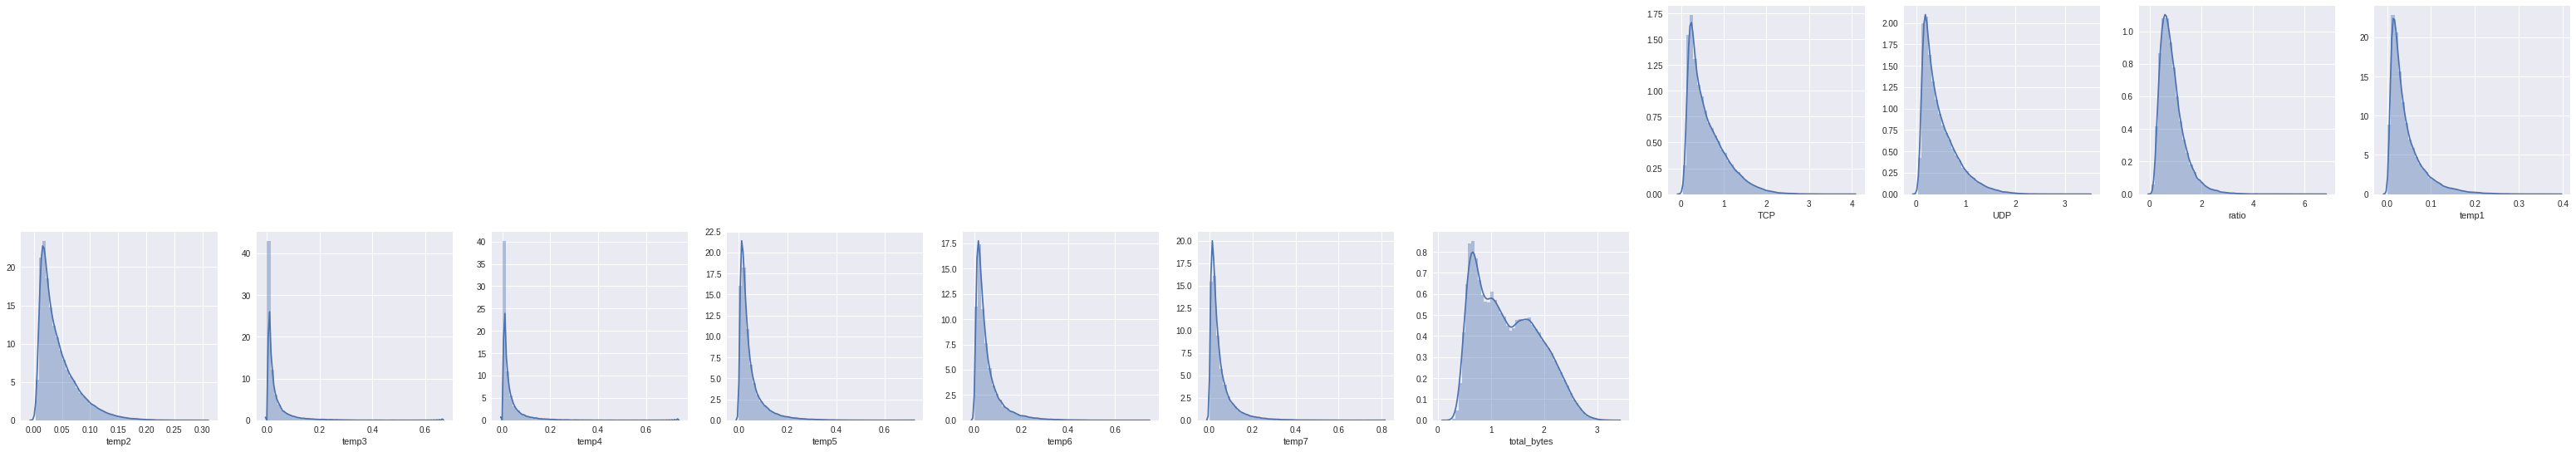

In [23]:
l = df.columns.values
number_of_columns=11
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
for i in range(40,51):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]].astype('float64'),kde=True)

# Feature Selection
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.
Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:
Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.

**From all the graphs which we have explored, we see that the subscriber count and usage data, both, play a major role in determining the type of congestion.
Let's apply few algorithms and see their result.**

### 1.Univariate selection
Statistical tests can be used to select those features that have the strongest relationships with the output variable.
The scikit-learn library provides the SelectKBest class, which can be used with a suite of different statistical tests to select a specific number of features.

In [50]:
df = df.drop(['par_year','par_month','Congestion_Type'], axis=1)
test.drop(['par_year','par_month'],axis = 1,inplace = True)
df.head()

,4G_rat,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,...,UDP,ratio,temp1,temp2,temp3,temp4,temp5,temp6,temp7,total_bytes
0,1,50,0.009113,0.001003,0.163925,0.007423,0.053262,0.065626,0.215563,0.042269,...,0.698011,1.497647,0.070296,0.028866,0.004227,0.071409,0.029155,0.027504,0.027695,1.490457
1,1,5,0.003199,0.005988,0.000993,0.014808,0.003328,0.017257,0.008490,0.006960,...,0.131295,0.922298,0.008971,0.010855,0.010462,0.001182,0.017607,0.010685,0.023451,0.480161
2,1,35,0.016658,0.002838,0.002834,0.075403,0.009006,0.010746,0.003647,0.032483,...,0.234683,0.364528,0.019683,0.044512,0.040581,0.062704,0.043492,0.018311,0.018700,1.232391
3,0,60,0.003018,0.027196,0.001475,0.025879,0.003486,0.035381,0.011505,0.008850,...,0.356487,1.082007,0.017262,0.019582,0.026893,0.007077,0.069743,0.042646,0.062863,1.019471
4,1,60,0.007001,0.006669,0.003168,0.023589,0.012200,0.034802,0.053362,0.011991,...,0.444646,0.291846,0.037217,0.129138,0.015280,0.004978,0.030687,0.160402,0.090869,2.047339


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = df.values
X = array[:,:]
test_kbest = SelectKBest(score_func=chi2, k=4)
fit = test_kbest.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
j=0;
for i in range(0,51):
    if j<4 and features[0,j]==array[0,i]:
        print(df.columns.values[i])
        j=j+1

[5.282e-01 5.585e+01 9.273e+02 6.506e+02 6.148e+02 6.643e+02 7.744e+02
 9.480e+02 9.368e+02 9.931e+02 6.591e+02 1.131e+03 1.106e+03 1.077e+03
 9.696e+02 1.116e+03 9.546e+02 1.032e+03 9.444e+02 6.572e+02 9.086e+02
 9.905e+02 9.841e+02 9.623e+02 9.854e+02 9.434e+02 9.262e+02 9.352e+02
 9.168e+02 3.024e-01 2.272e-01 7.112e-01 5.045e-01 1.089e+00 1.998e+00
 1.680e+00 1.137e+00 1.602e+04 1.233e+04 1.082e+01 1.132e+03 1.136e+03
 7.853e+02 7.815e+02 1.225e+03 1.338e+03 1.289e+03 1.715e+04]
TCP
UDP
temp6
total_bytes


### 2.Recursive Feature Elimination
RFE works by recursively removing attributes and building a model on attributes that remain. It uses model accuracy to identify which attributes (and combinations of attributes) contribute the most to predicting the target attribute. You can learn more about the RFE class in the scikit-learn documentation.

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
(print("Num Features: %d" % fit.n_features_,))
(print("Selected Features: %s" % fit.support_,))
(print("Feature Ranking: %s" % fit.ranking_,))

Num Features: 4
Selected Features: [False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False False False False False False  True]
Feature Ranking: [43 45  1 23 11 25 13 12 15 30 24 36 35 20 19 14 18 10 28 22 26 17 34 32
 33 29 16 27 31 40 42 41 44  2  4  5  3  1  1 39  8  6 38 37  9  7 21  1]


In [27]:
#printing features selected by RFE
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(df.columns[i])

subscriber_count
TCP
UDP
total_bytes


### 3. Feature importance using decision tree
When we train a classifier such as a decision tree, we evaluate each attribute to create splits; we can use this measure as a feature selector.
Random forests are among the most popular machine learning methods thanks to their relatively good accuracy, robustness, and ease of use. They also provide two straightforward methods for feature selection—mean decrease impurity and mean decrease accuracy.

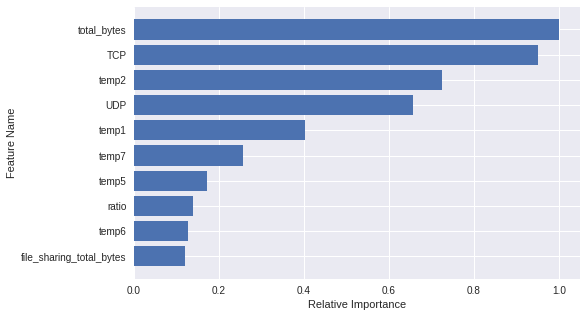

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.25)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
features =df.columns.values
importance = clf.feature_importances_ / np.max(clf.feature_importances_)
idx = np.argsort(importance)
n = 10
pos = np.arange(n) + 0.5
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(pos, importance[idx[-n:]], align='center')
plt.yticks(pos, features[idx[-n:]])
ax.set_xlabel('Relative Importance')
ax.set_ylabel('Feature Name')

plt.show()

It can be seen that the new engineered features are performing extremely better than the old original features. In all the three methods of feature selection, the new engineered features have clearly outperformed the old ones. New features like TCP, UDP, Total, temp5_t came out to be very important 

# Modelling

Once, the data is ready after pre-processing and new features are added, it is time for deploying the Machine Learning models for training on the training data to  be able to do predictions.
Here we have applied Logistic Regression, Decision Trees, Random Forests, XGBoost, Multi Layer Perceptron and Artificial Neural Networks.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

Using TensorFlow backend.


### 1. Logistic Regression

In [0]:
X_train, X_test, y_train,y_test = train_test_split(df,y,test_size = 0.3)
clf = LogisticRegression( multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred_lr)
accuracy=accuracy_score(y_test,y_pred_lr)
print(matthews_corrcoef(y_test, y_pred_lr))

0.6509653723874262


### 2. Decision Tree Classifier

In [0]:
# Set the parameters by cross-validation
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Tree
param_grid = {"max_depth": np.linspace(10, 15, 6).astype(int),
              "min_samples_split": np.linspace(2, 5, 4).astype(int)
              }
clf_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, y_pred_dt)
accuracy=accuracy_score(y_test,y_pred_dt)
print(matthews_corrcoef(y_test, y_pred_dt))

0.7023589113421054


### 3. Random Forest Classifier

In [0]:
clf2=RandomForestClassifier()
clf2.fit(X_train,y_train)
y_pred_rf=clf2.predict(X_test)

In [35]:
cm = confusion_matrix(y_test, y_pred_rf)
accuracy=accuracy_score(y_test,y_pred_rf)
print(matthews_corrcoef(y_test, y_pred_rf))

0.6930931173353837


### 4. XGBoost

In [0]:
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=5,
 min_child_weight=2,
 gamma=0.1,
 subsample=0.6,
 colsample_bytree=0.7,
 reg_alpha=0.1,
 objective= 'multi:softmax',
 scale_pos_weight=1,
 random_state=7,
 seed=27)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred_xgb)
accuracy=accuracy_score(y_test,y_pred_xgb)
print(matthews_corrcoef(y_test, y_pred_xgb))

0.7411982858980024


### 5. Multi-Layer Perceptron 

In [76]:
# Set the parameters by cross-validation
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# MLP
param_grid = {"hidden_layer_sizes": [(50,), (50, 50)],
              "alpha": np.logspace(-2, 2, 6)
              }
clf_mlp = GridSearchCV(MLPClassifier('lbfgs', max_iter=600), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 28.3min finished


In [77]:
cm = confusion_matrix(y_test, y_pred_mlp)
accuracy=accuracy_score(y_test,y_pred_mlp)
print(matthews_corrcoef(y_test, y_pred_mlp))

0.7203226786155977


### Hyper Parameter Tuning of XGBoost Classifier

In [55]:
# from sklearn.grid_search import GridSearchCV   #Perforing grid search
param_test1 = {
 'learning_rate':[0.01,0.025,0.05],
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'learning_rate': [0.01, 0.025, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.05}, 0.7951519991581207)

In [65]:
#Perforing grid search
param_test2 = {
 'reg_alpha':np.linspace(0.1,0.5,5),
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'reg_alpha': array([0.1, 0.2, 0.3, 0.4, 0.5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
gsearch2.best_params_, gsearch2.best_score_

({'reg_alpha': 0.4}, 0.7994069595862436)

In [67]:
param_test3 = {
 'reg_lambda':np.linspace(0,0.6,7)
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
gsearch3.best_params_, gsearch3.best_score_

({'reg_lambda': 0.39999999999999997}, 0.7989161000974427)

In [0]:
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=500,
 max_depth=5,
 min_child_weight=2,
 gamma=0.1,
 subsample=0.6,
 colsample_bytree=0.7,
 reg_alpha=0.4,
 reg_lambda=0.4,
 objective= 'multi:softmax',
 scale_pos_weight=1,
 random_state=7,
 seed=27)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_pred_xgb)
accuracy=accuracy_score(y_test,y_pred_xgb)
print(matthews_corrcoef(y_test, y_pred_xgb))


0.741715075257305


In [73]:
y_pred_xg=xgb.predict(X_train)
cm = confusion_matrix(y_train, y_pred_xg)
accuracy=accuracy_score(y_train,y_pred_xg)
print(matthews_corrcoef(y_train, y_pred_xg))

0.8151530526033866


# Prediction on Testing data

In [0]:
y_pred_test = xgb.predict(test)
y_pred_test = labelencoder_y.inverse_transform(y_pred_test)

In [0]:
df_final = pd.DataFrame({'cell_name':cell_name,
                        'Congestion_Type': y_pred_test})
df_final.to_csv('Submission.csv',header = True, index = False)